In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


Text(0.5, 1.0, 'image of a 5')

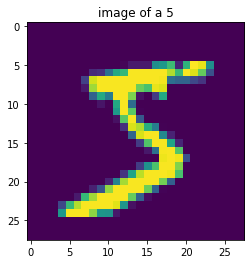

In [11]:
plt.imshow(x_train[0])
plt.title(f'image of a {y_train[0]}')

In [16]:
digits = []
for n in range(10):
    digits.append(x_train[y_train == n])

In [17]:
for n in range(10):
    print(f'there are {len(digits[n])} pictures of digit {n}.')

there are 5923 pictures of digit 0.
there are 6742 pictures of digit 1.
there are 5958 pictures of digit 2.
there are 6131 pictures of digit 3.
there are 5842 pictures of digit 4.
there are 5421 pictures of digit 5.
there are 5918 pictures of digit 6.
there are 6265 pictures of digit 7.
there are 5851 pictures of digit 8.
there are 5949 pictures of digit 9.


In [21]:
arr1 = np.arange(10)
arr2 = np.arange(10)
shuffler = np.random.permutation(len(arr1))
arr1 = arr1[shuffler]
arr2 = arr2[shuffler]
print(arr1)
print(arr2)

[3 9 6 7 5 0 1 8 4 2]
[3 9 6 7 5 0 1 8 4 2]
